# Setup

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json

# Sideband Fidelity Plots

In [2]:
f0g1_fidelities = json.load(open('Data/f0g1_fidelities.json'))

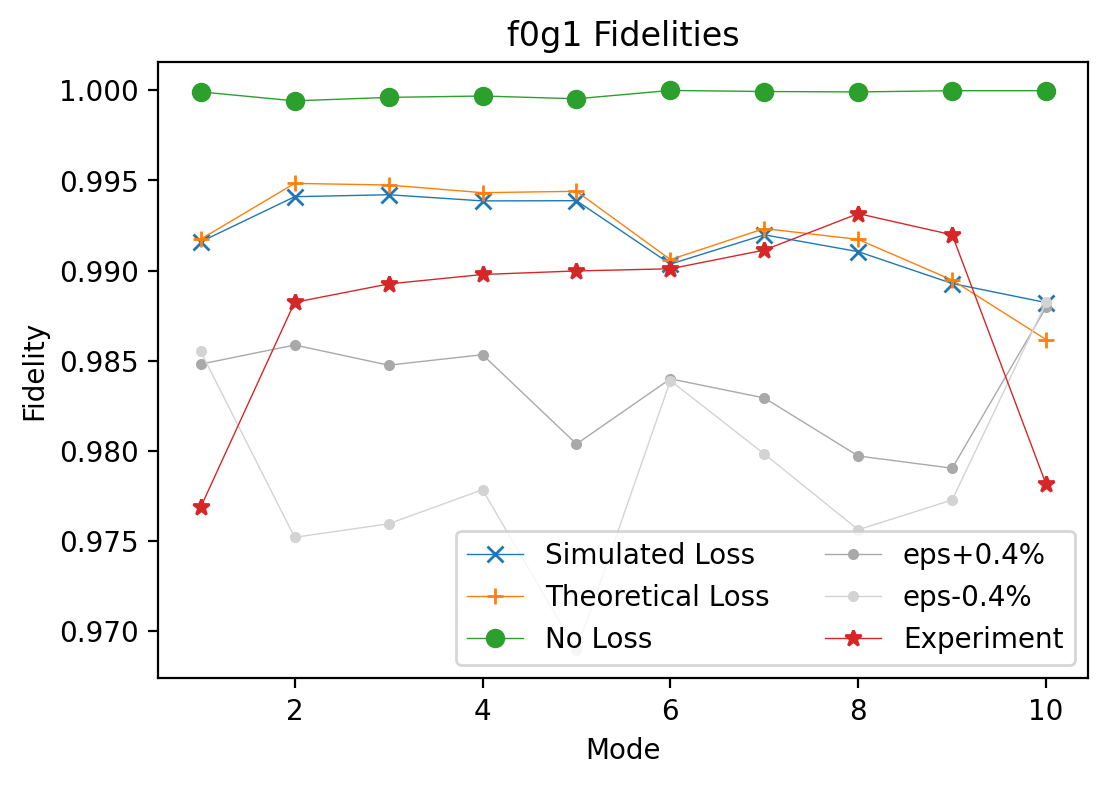

In [3]:
# Extract data from the dictionary
simulated_loss = f0g1_fidelities['Simulated_Loss']
theoretical_loss = f0g1_fidelities['Theoretical_Loss']
no_loss = f0g1_fidelities['No_Loss']
experiment = f0g1_fidelities['Experimental']
simulated_loss_upper = f0g1_fidelities['Simulated_Loss, +0.4%']
simulated_loss_lower = f0g1_fidelities['Simulated_Loss, -0.4%']

# Create a range for the x-axis
x = np.arange(len(simulated_loss))+1

# Plot the data
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x, simulated_loss, label='Simulated Loss', marker = "x", lw=0.5)
plt.plot(x, theoretical_loss, label='Theoretical Loss', marker = "+", lw = 0.5)
plt.plot(x, no_loss, label='No Loss', marker = "o", lw = 0.5)
plt.plot(x, simulated_loss_upper, label='eps+0.4%', marker = ".", lw=0.5, color = "darkgrey")
plt.plot(x, simulated_loss_lower, label='eps-0.4%', marker = ".", lw=0.5, color = "lightgrey")
plt.plot(x, experiment, label='Experiment', marker = "*", lw = 0.5)


# Add labels and title
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('f0g1 Fidelities')
plt.legend(ncol = 2)

# Show the plot
plt.show()

# $|g,N\rangle$ and $|g,0\rangle+|g,N\rangle$ State Prep

In [32]:
mode3_N_and_0pN_fidelities = json.load(open('Data/mode3_N_and_0pN_dat.json'))

In [33]:
mode3_N_and_0pN_fidelities["4"]

{'Calibrated': 0.9547358649222646,
 '-0.4% PT': 0.9306411231567087,
 '-0.4%': 0.906240295778516,
 'Calibrated PT': 0.9707489883267618,
 '+0.4%': 0.9486950676691095,
 '+0.4% PT': 0.9618300172117694}

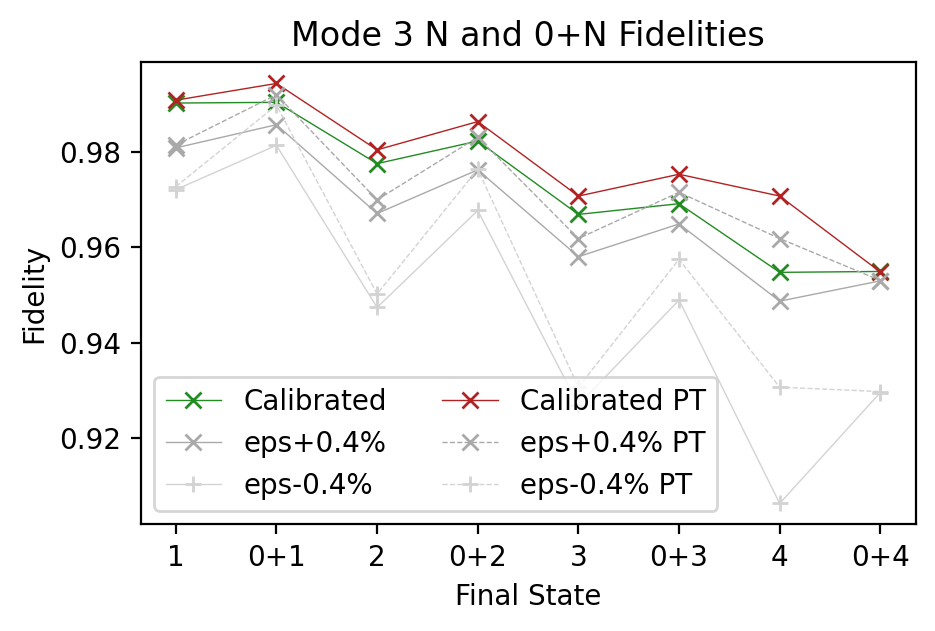

In [35]:
key_order = ["1", "0+1", "2", "0+2", "3", "0+3", "4", "0+4"]
calibrated = [mode3_N_and_0pN_fidelities[key]['Calibrated'] for key in key_order]
upper = [mode3_N_and_0pN_fidelities[key]['+0.4%'] for key in key_order]
lower = [mode3_N_and_0pN_fidelities[key]['-0.4%'] for key in key_order]

plt.figure(figsize=(5, 3), dpi=200)
x = np.arange(len(calibrated))+1
plt.plot(x, calibrated, label='Calibrated', marker = "x", lw=0.5, color = "forestgreen")
plt.plot(x, upper, label='eps+0.4%', marker = "x", lw=0.5, color = "darkgrey")
plt.plot(x, lower, label='eps-0.4%', marker = "+", lw=0.5, color = "lightgrey")


calibrated_pt = [mode3_N_and_0pN_fidelities[key]['Calibrated PT'] for key in key_order]
upper_pt = [mode3_N_and_0pN_fidelities[key]['+0.4% PT'] for key in key_order]
lower_pt = [mode3_N_and_0pN_fidelities[key]['-0.4% PT'] for key in key_order]

plt.plot(x, calibrated_pt, label='Calibrated PT', marker = "x", lw=0.5, color = "firebrick")
plt.plot(x, upper_pt, label='eps+0.4% PT', marker = "x", lw=0.5, color = "darkgrey", linestyle = "--")
plt.plot(x, lower_pt, label='eps-0.4% PT', marker = "+", lw=0.5, color = "lightgrey", linestyle = "--")


plt.xlabel('Final State')
plt.ylabel('Fidelity')
plt.title('Mode 3 N and 0+N Fidelities')
plt.xticks(x, key_order)
plt.legend(ncol = 2)

plt.show()

In [7]:
mode3_N_and_0pN_fidelities.keys()

dict_keys(['0+4', '4', '1', '0+1', '0+2', '2', '0+3', '3'])

# Binomial Code Error Budget Plot

In [36]:
binomial_code_dat = json.load(open('Data/BinomialCodeErrorBudgetFidelties.json'))

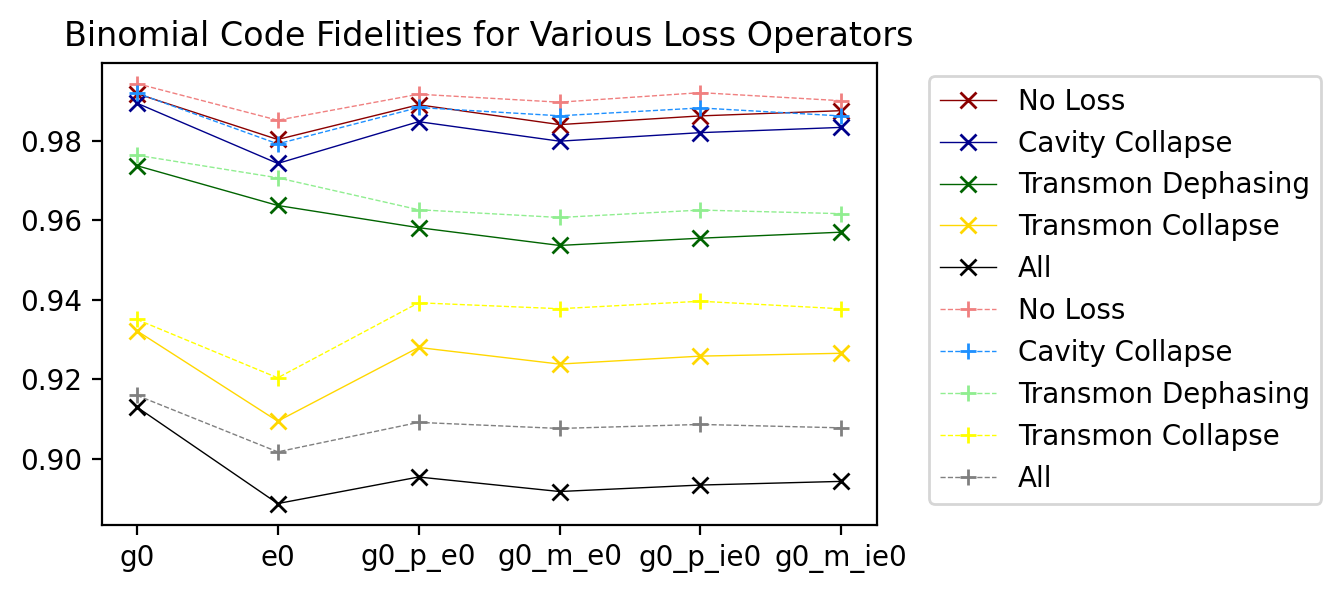

In [50]:
plt.figure(figsize=(5, 3), dpi=200)

x = np.arange(len(binomial_code_dat["init_states"]))+1

plt.plot(x, binomial_code_dat["fid"][""], lw = 0.5, marker = "x", label = "No Loss", color = "darkred")
plt.plot(x, binomial_code_dat["fid"]["Mode3 Collapse"], lw = 0.5, marker = "x", label = "Cavity Collapse", color = "darkblue")
plt.plot(x, binomial_code_dat["fid"]["Transmon Dephasing"], lw = 0.5, marker = "x", label = "Transmon Dephasing", color = "darkgreen")
plt.plot(x, binomial_code_dat["fid"]["Transmon Collapse"], lw = 0.5, marker = "x", label = "Transmon Collapse", color = "gold")
plt.plot(x, binomial_code_dat["fid"]["All"], lw = 0.5, marker = "x", label = "All", color = "black")

plt.plot(x, binomial_code_dat["fid_PT"][""], lw = 0.5, marker = "+", label = "No Loss", linestyle = "--", color = "lightcoral")
plt.plot(x, binomial_code_dat["fid_PT"]["Mode3 Collapse"], lw = 0.5, marker = "+", label = "Cavity Collapse", linestyle = "--", color = "dodgerblue")
plt.plot(x, binomial_code_dat["fid_PT"]["Transmon Dephasing"], lw = 0.5, marker = "+", label = "Transmon Dephasing", linestyle = "--", color = "lightgreen")
plt.plot(x, binomial_code_dat["fid_PT"]["Transmon Collapse"], lw = 0.5, marker = "+", label = "Transmon Collapse", linestyle = "--", color = "yellow")
plt.plot(x, binomial_code_dat["fid_PT"]["All"], lw = 0.5, marker = "+", label = "All", linestyle = "--", color = "grey")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(x, binomial_code_dat["init_states"])
plt.title("Binomial Code Fidelities for Various Loss Operators") 
plt.show()

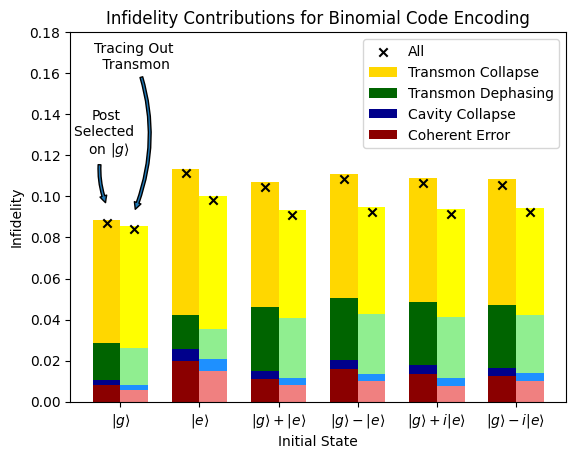

In [160]:
states = [r"$|g\rangle$", r"$|e\rangle$", r"$|g\rangle+|e\rangle$", r"$|g\rangle-|e\rangle$", r"$|g\rangle+i|e\rangle$", r"$|g\rangle-i|e\rangle$"]


# No Traceout Transmon
encoding_error = (1-np.array(binomial_code_dat["fid"][""]))
weight_counts = {
    "Coherent Error": 1-np.array(binomial_code_dat["fid"][""]),
    "Cavity Collapse": 1-np.array(binomial_code_dat["fid"]["Mode3 Collapse"])-encoding_error,
    "Transmon Dephasing": 1-np.array(binomial_code_dat["fid"]["Transmon Dephasing"])-encoding_error,
    "Transmon Collapse": 1-np.array(binomial_code_dat["fid"]["Transmon Collapse"])-encoding_error
}

width = 0.35

fig, ax = plt.subplots()
bottom = np.zeros(len(states))
color = dict(zip(weight_counts.keys(), ["darkred", "darkblue", "darkgreen", "gold"]))
x = np.arange(len(states))
for boolean, weight_count in weight_counts.items():
    p = ax.bar(x-width/2, weight_count, width, label=boolean, bottom=bottom, color = color[boolean])
    bottom += weight_count
ax.scatter(x-width/2, 1-np.array(binomial_code_dat["fid"]["All"]), color = "black", marker = "x")


# Tracing Out Transmon

encoding_error = (1-np.array(binomial_code_dat["fid_PT"][""]))
weight_counts = {
    "Coherent Error": 1-np.array(binomial_code_dat["fid_PT"][""]),
    "Cavity Collapse": 1-np.array(binomial_code_dat["fid_PT"]["Mode3 Collapse"])-encoding_error,
    "Transmon Dephasing": 1-np.array(binomial_code_dat["fid_PT"]["Transmon Dephasing"])-encoding_error,
    "Transmon Collapse": 1-np.array(binomial_code_dat["fid_PT"]["Transmon Collapse"])-encoding_error
}
color = dict(zip(weight_counts.keys(), ["lightcoral", "dodgerblue", "lightgreen", "yellow"]))
x = np.arange(len(states))
bottom = 0
for boolean, weight_count in weight_counts.items():
    p = ax.bar(x+width/2, weight_count, width, bottom=bottom, color = color[boolean])
    bottom += weight_count
ax.scatter(x+width/2, 1-np.array(binomial_code_dat["fid_PT"]["All"]), color = "black", marker = "x", label = "All")


ax.set_xticks(x, states)
ax.set_title("Infidelity Contributions for Binomial Code Encoding")
#ax.legend(bbox_to_anchor=(1, 1))
#ax.legend(loc = "upper center", ncol = 2)


xy = (x[0]-width/2, (1-binomial_code_dat["fid"]["All"][0])*1.1)
xy_text = (x[0]-width/2, (1-binomial_code_dat["fid"]["All"][0])*1.5)
ax.annotate('Post\nSelected \n 'r'on $|g\rangle$', xy=xy, xytext=xy_text, va = "center", ha = "center", arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"))

xy = (x[0]+width/2, (1-binomial_code_dat["fid_PT"]["All"][0])*1.1)
xy_text = (x[0]+width/2, (1-binomial_code_dat["fid_PT"]["All"][0])*2)
ax.annotate('Tracing Out\n Transmon', xy=xy, xytext=xy_text, va = "center", ha = "center", arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"))


handles, labels = plt.gca().get_legend_handles_labels()
order = [0,4,3,2,1]#[1,2,3,4,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol = 1)

ax.set_ylabel("Infidelity")
ax.set_ylim(0, 0.18)
ax.set_xlabel("Initial State")
plt.show()


#

# $|g2\rangle$ and $|g,0\rangle+|g,4\rangle$ State Prep for all Modes

In [142]:
fidelities_2_and_0p4 = json.load(open('Data/StatePrepFidelities_2_and_0p4_All_Modes.json'))
#fidelities_2_and_0p4_No_T = json.load(open('Data/StatePrepFidelities_2_and_0p4_All_Modes_Traced_Out_Transmon.json'))

In [143]:
fidelities_2_and_0p4.keys()

dict_keys(['TargetState', 'PT'])

Text(0.5, 1.0, 'State Preparation Fidelities')

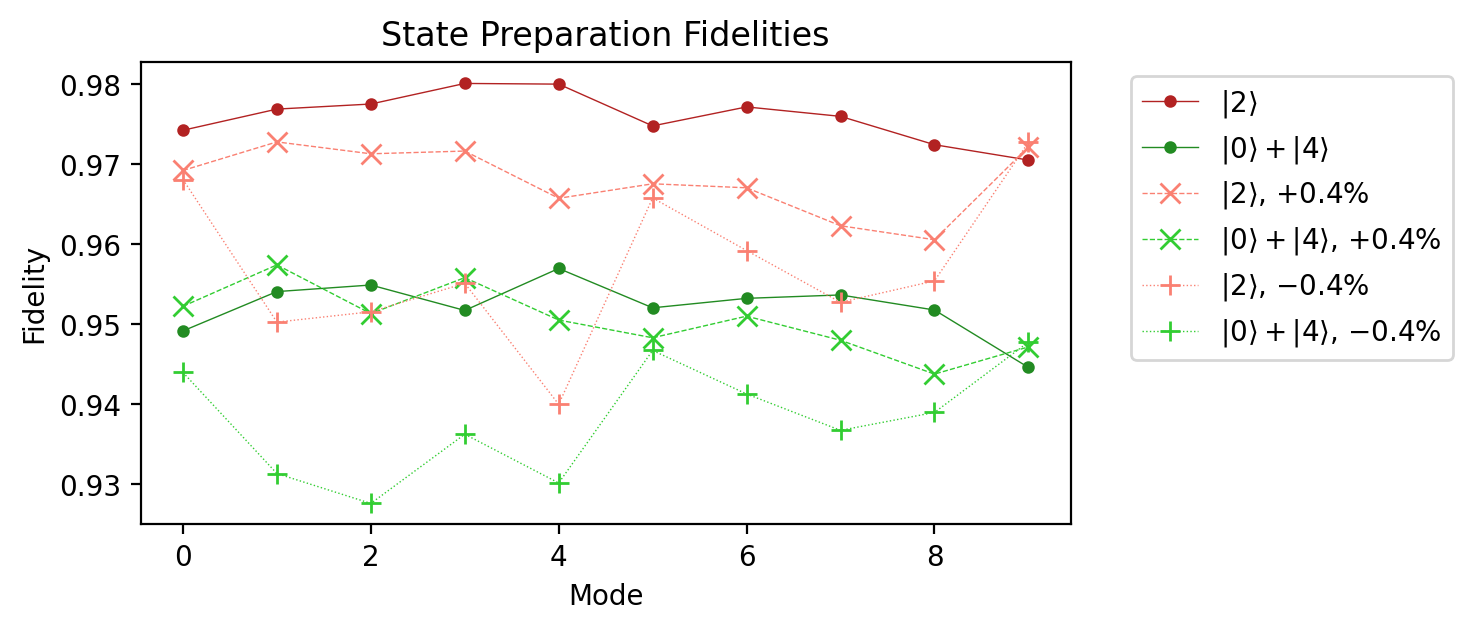

In [145]:
fig = plt.figure(figsize=(6, 3), dpi=200)

linewidth = 0.5
markersize = 7
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["2"], markersize = markersize, marker = ".", label = r"$|2\rangle$", lw = linewidth, color = "firebrick")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["0_p_4"], markersize = markersize, marker = ".", label = r"$|0\rangle+|4\rangle$", lw = linewidth, color = "forestgreen")

plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["2"], markersize = markersize, marker = "x", label = r"$|2\rangle$, $+0.4\%$", lw = linewidth, color = "salmon", linestyle = "--")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["0_p_4"], markersize = markersize, marker = "x", label = r"$|0\rangle+|4\rangle$, $+0.4\%$", lw = linewidth, color = "limegreen", linestyle = "--")


plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["2"], markersize = markersize, marker = "+", label = r"$|2\rangle$, $-0.4\%$", lw = linewidth, color = "salmon", linestyle = ":")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["0_p_4"], markersize = markersize, marker = "+", label = r"$|0\rangle+|4\rangle$, $-0.4\%$", lw = linewidth, color = "limegreen", linestyle = ":")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('State Preparation Fidelities')

Text(0.5, 1.0, 'State Preparation Fidelities (Traced Out Transmon)')

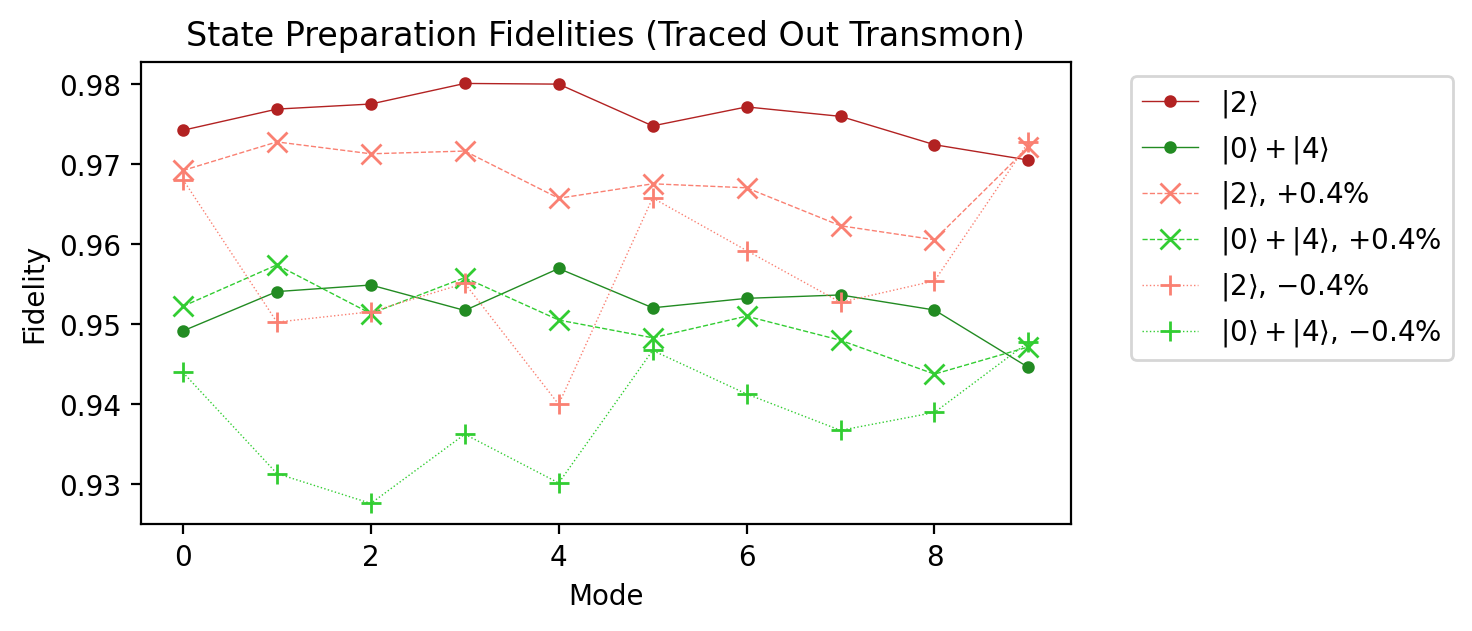

In [149]:
fig = plt.figure(figsize=(6, 3), dpi=200)

linewidth = 0.5
markersize = 7
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["2"], markersize = markersize, marker = ".", label = r"$|2\rangle$", lw = linewidth, color = "firebrick")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["0_p_4"], markersize = markersize, marker = ".", label = r"$|0\rangle+|4\rangle$", lw = linewidth, color = "forestgreen")

plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["2"], markersize = markersize, marker = "x", label = r"$|2\rangle$, $+0.4\%$", lw = linewidth, color = "salmon", linestyle = "--")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["0_p_4"], markersize = markersize, marker = "x", label = r"$|0\rangle+|4\rangle$, $+0.4\%$", lw = linewidth, color = "limegreen", linestyle = "--")


plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["2"], markersize = markersize, marker = "+", label = r"$|2\rangle$, $-0.4\%$", lw = linewidth, color = "salmon", linestyle = ":")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["0_p_4"], markersize = markersize, marker = "+", label = r"$|0\rangle+|4\rangle$, $-0.4\%$", lw = linewidth, color = "limegreen", linestyle = ":")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('State Preparation Fidelities (Traced Out Transmon)')

Text(0.5, 1.0, 'State Preparation Fidelities')

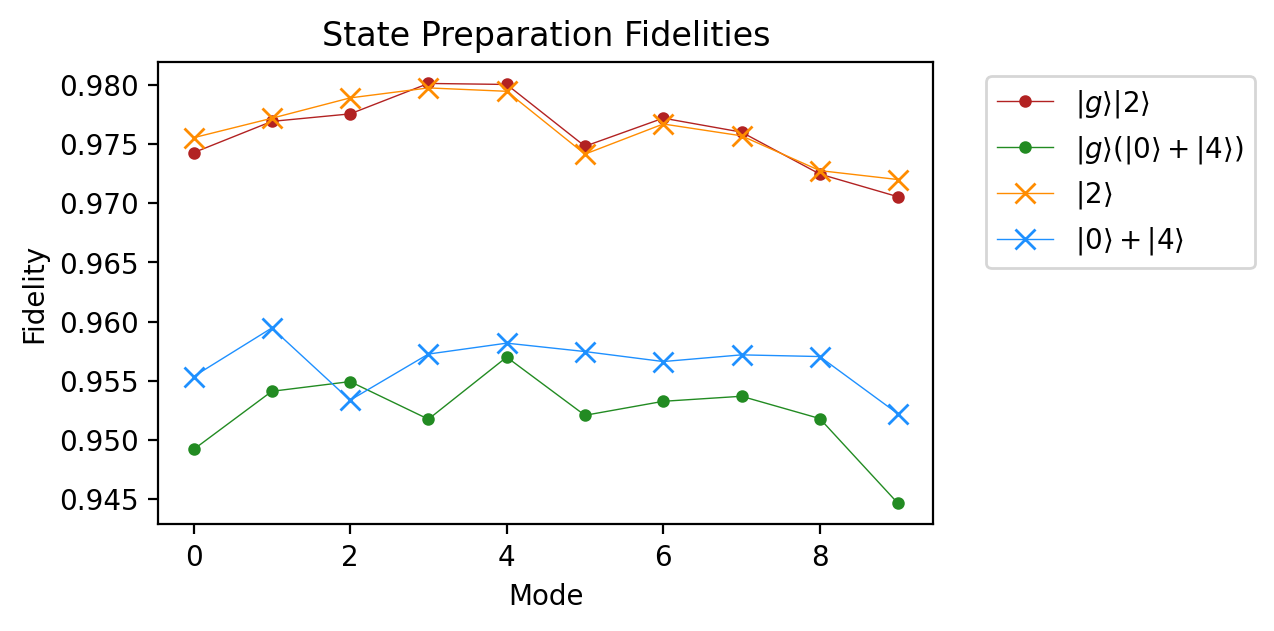

In [150]:
fig = plt.figure(figsize=(5, 3), dpi=200)

linewidth = 0.5
markersize = 7
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["2"], markersize = markersize, marker = ".", label = r"$|g\rangle|2\rangle$", lw = linewidth, color = "firebrick")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["0_p_4"], markersize = markersize, marker = ".", label = r"$|g\rangle(|0\rangle+|4\rangle)$", lw = linewidth, color = "forestgreen")

plt.plot(fidelities_2_and_0p4["PT"]["fidelities"]["2"], markersize = markersize, marker = "x", label = r"$|2\rangle$", lw = linewidth, color = "darkorange")
plt.plot(fidelities_2_and_0p4["PT"]["fidelities"]["0_p_4"], markersize = markersize, marker = "x", label = r"$|0\rangle+|4\rangle$", lw = linewidth, color = "dodgerblue")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('State Preparation Fidelities')